In [ ]:
!pip install plotly

In [ ]:
import os
os.chdir('/Users/priya/Desktop/AST')
file = __import__("ALY6140_Capstone_Project_Group_6")
file.main()

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
df = pd.read_csv('https://data.boston.gov/dataset/8048697b-ad64-4bfc-b090-ee00169f2323/resource/6ff6a6fd-3141-4440-a880-6f60a37fe789/download/tmpfoxzgw4v.csv', sep=',') #reading the csv file from the url
df

,case_enquiry_id,open_dt,target_dt,closed_dt,ontime,case_status,closure_reason,case_title,subject,reason,...,police_district,neighborhood,neighborhood_services_district,ward,precinct,location_street_name,location_zipcode,latitude,longitude,source
0,101003189741,2020-02-07 15:17:00,2020-06-06 15:17:27,NaN,OVERDUE,Open,,Overcrowding,Inspectional Services,Housing,...,D4,Back Bay,14,Ward 5,0507,116 Marlborough St,2116.0,42.3531,-71.0771,Constituent Call
1,101003156344,2020-01-10 13:49:00,2021-12-30 13:49:25,NaN,ONTIME,Open,,Contractors Complaint,Inspectional Services,Building,...,C6,South Boston,5,06,0609,874 E Sixth St,2127.0,42.3335,-71.0260,Constituent Call
2,101003151198,2020-01-04 13:52:00,NaN,NaN,ONTIME,Open,,Space Savers,Public Works Department,Sanitation,...,C11,Dorchester,8,Ward 16,1603,14 Banton St,2124.0,42.2885,-71.0643,Citizens Connect App
3,101003174391,2020-01-21 10:05:00,2021-01-20 10:06:15,NaN,ONTIME,Open,,New Tree Requests,Parks & Recreation Department,Trees,...,B2,Mission Hill,14,Ward 10,1003,746 Huntington Ave,2120.0,42.3336,-71.1055,Employee Generated
4,101003174624,2020-01-21 11:50:17,NaN,NaN,ONTIME,Open,,Other: Compliment,Mayor's 24 Hour Hotline,Employee & General Comments,...,,,,,,NaN,NaN,42.3594,-71.0587,Constituent Call
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231881,101003533571,2020-12-01 20:45:00,2020-12-02 20:45:46,NaN,OVERDUE,Open,,Unsafe/Dangerous Conditions,Inspectional Services,Building,...,A1,Downtown / Financial District,3,Ward 3,0303,4 N Bennet Ct,2113.0,42.3655,-71.0549,Constituent Call
231882,101003533608,2020-12-01 22:10:00,2020-12-09 08:30:00,NaN,ONTIME,Open,,Protection of Adjoining Property,Inspectional Services,Building,...,C11,Dorchester,8,Ward 15,1504,17 Wilkinson Park,2122.0,42.3068,-71.0614,Constituent Call
231883,101003533614,2020-12-01 22:27:00,2020-12-03 22:27:22,NaN,ONTIME,Open,,Work w/out Permit,Inspectional Services,Building,...,C6,South Boston,5,06,0607,799 E Third St,2127.0,42.3365,-71.0278,Constituent Call
231884,101003533618,2020-12-01 22:32:00,2022-11-21 22:32:20,NaN,ONTIME,Open,,Working Beyond Hours,Inspectional Services,Building,...,E13,Jamaica Plain,11,19,1906,632-638 Centre St,2130.0,42.3136,-71.1139,Constituent Call


# Data Cleansing

In [4]:
df['open_dt'] = pd.to_datetime(df['open_dt'])
df['target_dt'] = pd.to_datetime(df['target_dt'])
df['closed_dt'] = pd.to_datetime(df['closed_dt'])

df['Open_Year'] = df['open_dt'].dt.year
df['Open_Month'] = df['open_dt'].dt.month
df['Target_Year'] = df['target_dt'].dt.year
df['Target_Month'] = df['target_dt'].dt.month
df['Close_Year'] = df['closed_dt'].dt.year
df['Close_Month'] = df['closed_dt'].dt.month



In [5]:
df['neighborhood'] = df['neighborhood'].fillna("No Data")
df['case_title'] = df['case_title'].fillna("No Data")
df['location_zipcode'] = df['location_zipcode'].fillna("00000").astype(int)
#df['target_dt'] = df['target_dt'].fillna("9999-01-01 00:00:00")
#df['closed_dt'] = df['closed_dt'].fillna("9999-01-01 00:00:00")
df['Target_Month']=df['Target_Month'].fillna("0").astype(int)
df['Close_Month']=df['Close_Month'].fillna("0").astype(int)
df['Target_Year']=df['Target_Year'].fillna("0000").astype(int)
df['Close_Year']=df['Close_Year'].fillna("0000").astype(int)

In [6]:
df.drop('submittedphoto',
  axis='columns', inplace=True)
df.drop('closedphoto',
  axis='columns', inplace=True)
df.drop('fire_district',
  axis='columns', inplace=True)
df.drop('pwd_district',
  axis='columns', inplace=True)
df.drop('city_council_district',
  axis='columns', inplace=True)
df.drop('police_district',
  axis='columns', inplace=True)
df.drop('neighborhood_services_district',
  axis='columns', inplace=True)
df.drop('location_street_name',
  axis='columns', inplace=True)
df.drop('precinct',
  axis='columns', inplace=True)
df.drop('latitude',
  axis='columns', inplace=True)
df.drop('longitude',
  axis='columns', inplace=True)
df.drop('queue',
  axis='columns', inplace=True)
df.drop('ward',
  axis='columns', inplace=True)

In [7]:
df.dtypes.to_frame(name='Type')

,Type
case_enquiry_id,int64
open_dt,datetime64[ns]
target_dt,datetime64[ns]
closed_dt,datetime64[ns]
ontime,object
case_status,object
closure_reason,object
case_title,object
subject,object
reason,object


In [8]:
df.isnull().sum().to_frame(name='missing counts')

,missing counts
case_enquiry_id,0
open_dt,0
target_dt,40754
closed_dt,33162
ontime,0
case_status,0
closure_reason,0
case_title,0
subject,0
reason,0


# Visualiztions

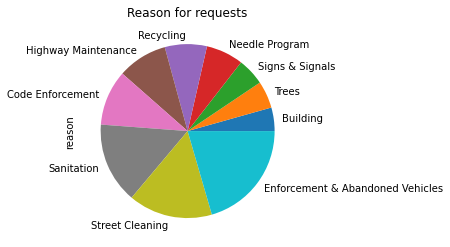

In [9]:
#Top 10 reaons for requests 
df['reason'].value_counts()[:10]
df['reason'].value_counts()[:10].sort_values().plot(title='Reason for requests', kind='pie')

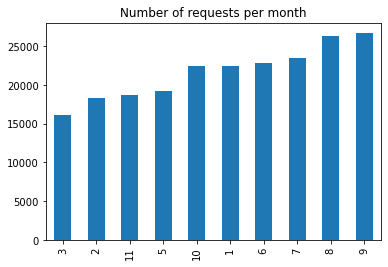

In [10]:
#which month received more requests
df['Open_Month'].value_counts()[:]
df['Open_Month'].value_counts()[:10].sort_values().plot(title='Number of requests per month', kind='bar')

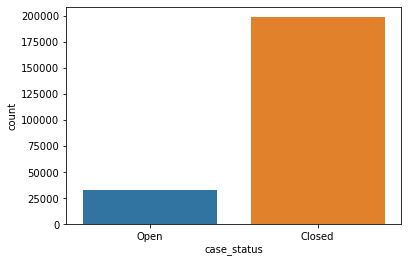

In [11]:
# How many requests are resolved
df['case_status'].value_counts()
sns.countplot(data = df, x = 'case_status')

In [12]:
# how many reuests are running ontime 
df['ontime'].value_counts()

ONTIME     193490
OVERDUE     38396
Name: ontime, dtype: int64

In [13]:
# Determining different type of request for each reason
request_reason_type = df.groupby('reason')['type'].value_counts()
print(f'\nThe reason of requests of each type\n{request_reason_type}\n')


The reason of requests of each type
reason                             type                          
Abandoned Bicycle                  Abandoned Bicycle                 956
Administrative & General Requests  Public Works General Request      422
                                   Parks General Request             367
                                   Transportation General Request    283
                                   BWSC General Request              198
                                                                    ... 
Weights and Measures               No Price on Gas/Wrong Price         5
                                   Product Short Measure               3
                                   Short Measure - Gas                 3
                                   Scale Not Visible                   2
                                   Water in Gas - High Priority        1
Name: type, Length: 173, dtype: int64



In [14]:
df['neighborhood'].value_counts()

Dorchester                                      35645
Roxbury                                         21835
South Boston / South Boston Waterfront          18718
Allston / Brighton                              16669
South End                                       15661
East Boston                                     15400
Jamaica Plain                                   12532
Hyde Park                                       12038
Downtown / Financial District                   11893
Greater Mattapan                                10320
Back Bay                                        10319
Charlestown                                      8305
West Roxbury                                     8293
Roslindale                                       8121
Boston                                           6281
Beacon Hill                                      5077
Fenway / Kenmore / Audubon Circle / Longwood     4091
Mission Hill                                     3920
                            

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


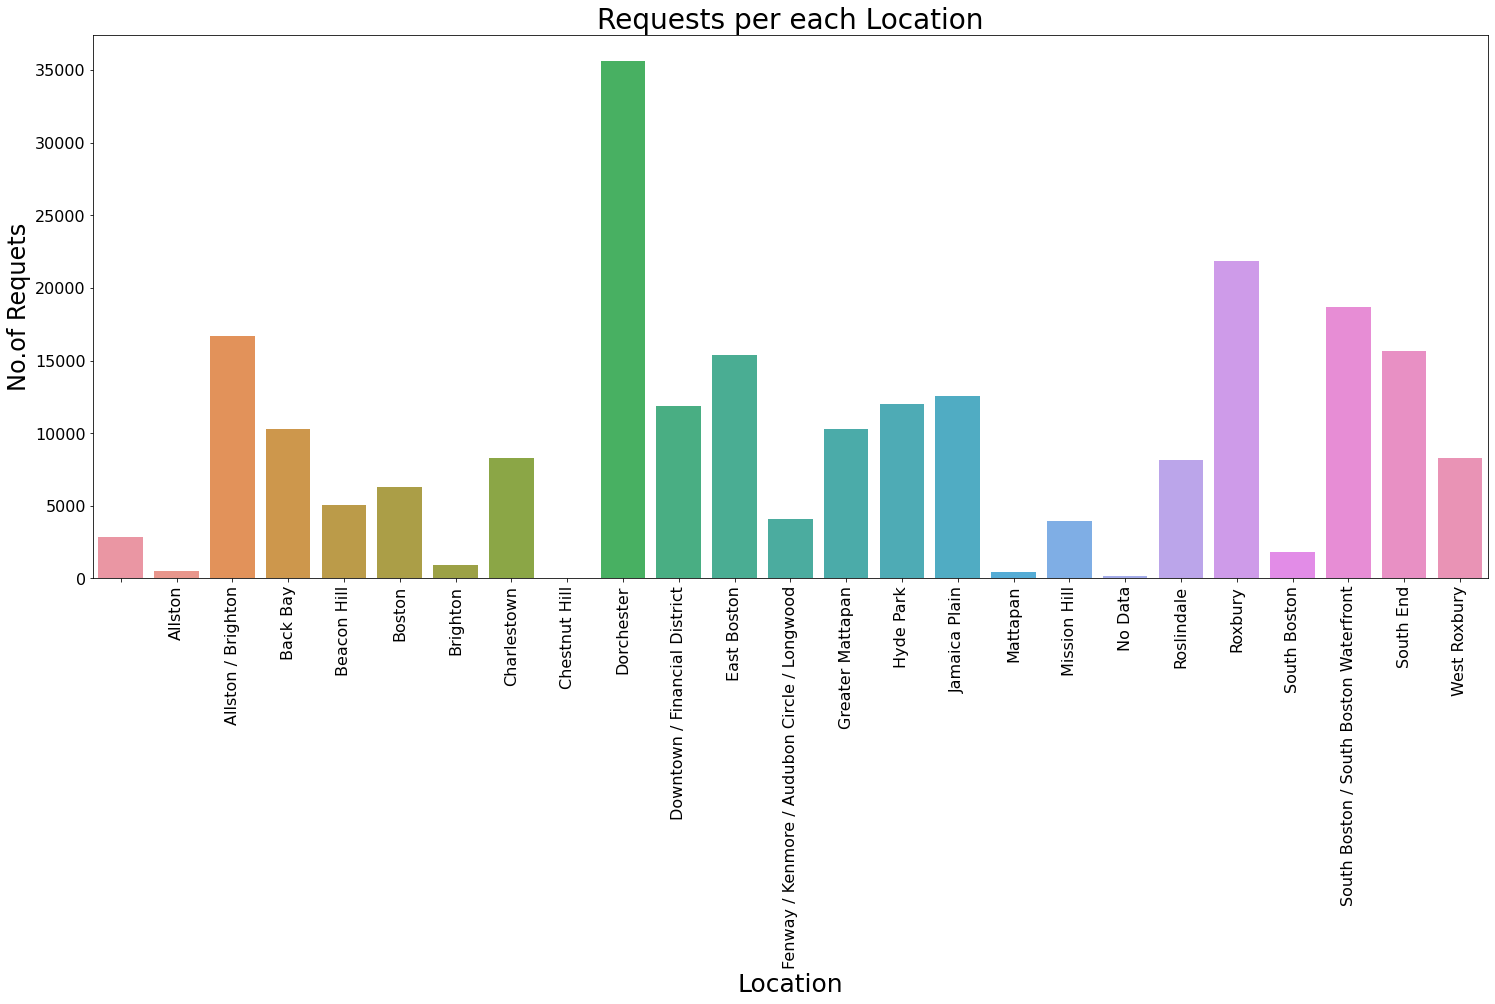

In [15]:
# Neighbourhood with max requests
count=df[['neighborhood', 'case_enquiry_id', 'open_dt']]
count

#As complaint ID has unique complaint, changing them to 1 to get cumulative sum.
count.loc[count['case_enquiry_id'] > 0, 'case_enquiry_id'] = 1
count

#Grouped the state and Date recieved columnn and taking cumulative sum
complaints_state=count.groupby(['neighborhood'])['case_enquiry_id'].sum().reset_index()

plt.figure(figsize=(25,10))

x = sns.barplot(x="neighborhood", y="case_enquiry_id", data=complaints_state)
plt.xticks(rotation=90)

plt.title('Requests per each Location', fontsize=28)
plt.xlabel('Location', fontsize=25)
plt.ylabel('No.of Requets', fontsize=24)
plt.tick_params(axis='both',labelsize=16)

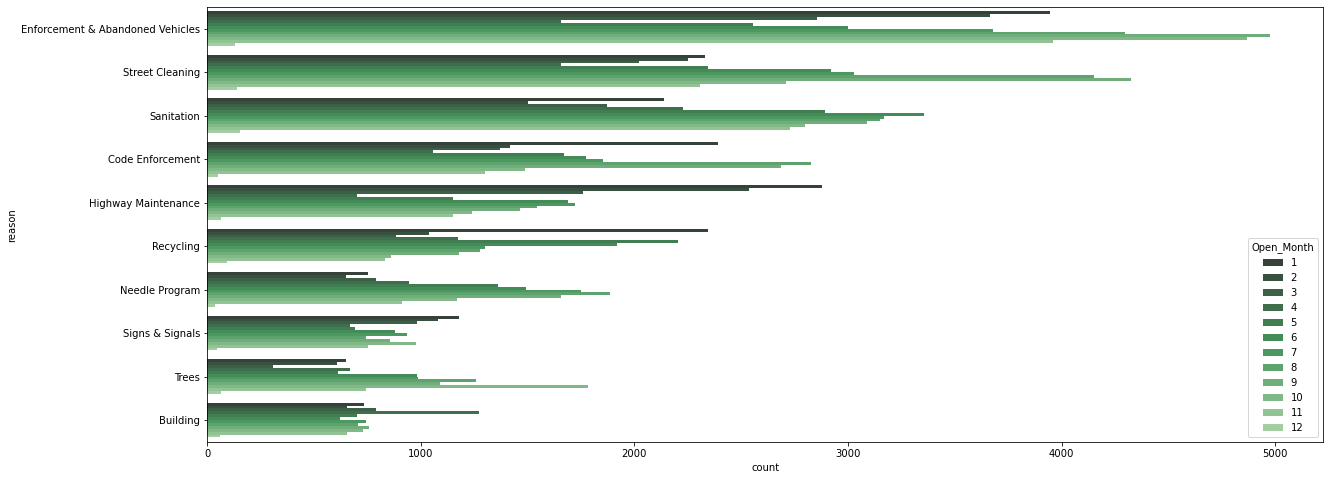

In [16]:
# Max source of requests
df['source'].value_counts()
plt.figure(figsize=(20,8)) # this creates a figure 8 inch wide, 4 inch high
#sns.countplot(x="Open_Month", hue= 'source' , data = df)
sns.countplot(y="reason", hue="Open_Month", data=df, palette="Greens_d",
              order=df['reason'].value_counts()[:10].index)
plt.show()

In [17]:
max_source_neighbourhood = df.groupby('source')['neighborhood'].value_counts()
print(f'\nThe maximum source used for requests from each neughbourhood \n{max_source_neighbourhood}\n')


The maximum source used for requests from each neughbourhood 
source                neighborhood                          
Citizens Connect App  Dorchester                                13187
                      South Boston / South Boston Waterfront    11184
                      South End                                 10554
                      Roxbury                                    9191
                      East Boston                                7375
                                                                ...  
Self Service          South Boston                                 34
                      Allston                                      12
                      Mattapan                                     11
                      No Data                                       3
Twitter               Dorchester                                    1
Name: neighborhood, Length: 124, dtype: int64



# Predective Analysis

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics, preprocessing
import seaborn as sn
import matplotlib.pyplot as plt

In [19]:
final_df = pd.DataFrame()

In [20]:
def make_lower(s):
    if isinstance(s, str):
        return s.lower()
    return str(s).lower()

In [21]:
case_titlelabel_encoder = preprocessing.LabelEncoder()
reasonlabel_encoder = preprocessing.LabelEncoder()
subjectlabel_encoder = preprocessing.LabelEncoder()

In [22]:
final_df["case_title"] = case_titlelabel_encoder.fit_transform(df.case_title.apply(make_lower))

In [23]:
final_df["reason"] = reasonlabel_encoder.fit_transform(df.reason.apply(make_lower))

In [24]:
final_df["subject"] = subjectlabel_encoder.fit_transform(df.subject)

In [25]:
X = final_df[final_df.columns[:-1]]
y = final_df[final_df.columns[-1]]

In [26]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

# Logistic regression

In [27]:
logistic_regression= LogisticRegression(max_iter=500)
logistic_regression.fit(X_train,y_train)
y_pred=logistic_regression.predict(X_test)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [28]:
final_df.subject.value_counts()

9     119853
10     50287
4      19906
5      17203
7      16675
8       3197
0       3055
2       1097
1        562
6         27
3         24
Name: subject, dtype: int64

Accuracy:  0.6556268543434761


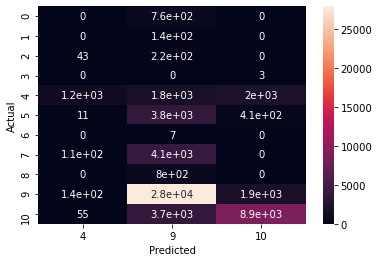

In [29]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)

print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))
plt.show()

# KNN

In [30]:
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier


In [31]:
Kmod = KNeighborsClassifier(n_neighbors = 3000)
Kmod.fit (X_train, y_train)

KNeighborsClassifier(n_neighbors=3000)

In [32]:
prediction = Kmod.predict(X_test)

Accuracy:  0.8983819775063824


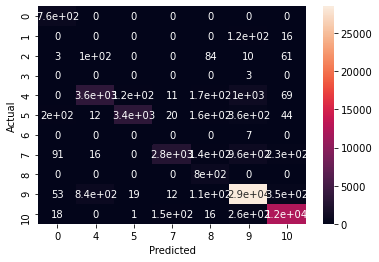

In [33]:
confusion_matrix = pd.crosstab(y_test, prediction, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)
print('Accuracy: ',metrics.accuracy_score(y_test, prediction))

# Random Forest

In [34]:
train_features = X_train
test_features = X_test
train_labels = y_train
test_labels = y_test

In [35]:
import sklearn.ensemble
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification# Instantiate model with 1000 decision trees
rf = RandomForestClassifier(n_estimators = 1000, random_state = 42)# Train the model on training data

In [36]:
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1000, random_state=42)

In [37]:
predictions = rf.predict(X_test)

In [38]:
predictions = predictions.astype(int)

Accuracy:  0.9998620023459601


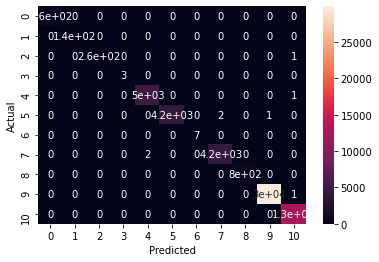

In [39]:
confusion_matrix = pd.crosstab(y_test, predictions, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)

print('Accuracy: ',metrics.accuracy_score(y_test, predictions))
plt.show()

In [42]:
Case_title="Requests for Street Cleaning"
Reason= "Street Cleaning"
test_case_title = case_titlelabel_encoder.transform(["Requests for Street Cleaning".lower()])[0]
test_reason = reasonlabel_encoder.transform(["Street Cleaning".lower()])[0]
testxdf = pd.DataFrame([[test_case_title,test_reason]])

print("The case title is",Case_title)
print("The reason mentioned is",Reason)
print("The output of our models is")

print("Logistic regression output :  ", end="")
print(subjectlabel_encoder.inverse_transform(logistic_regression.predict(testxdf)))

print("Random forest classifier output :  ", end="")
print(subjectlabel_encoder.inverse_transform(rf.predict(testxdf).astype(int)))

print("K-Nearest Neighbors output :  ", end="")
print(subjectlabel_encoder.inverse_transform(Kmod.predict(testxdf).astype(int)))

The case title is Requests for Street Cleaning
The reason mentioned is Street Cleaning
The output of our models is
Logistic regression output :  ['Public Works Department']
Random forest classifier output :  ['Public Works Department']
K-Nearest Neighbors output :  ['Public Works Department']
